In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('data/Crop_AgroVars_rawdata_Rwanda_2014-2020.csv')

# Preview top rows
df.head()


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,646,Rwanda,5312,Area harvested,1311.0,Avocados,2014,2014,ha,650.0,E,Estimated value
1,QCL,Crops and livestock products,646,Rwanda,5419,Yield,1311.0,Avocados,2014,2014,hg/ha,116923.0,E,Estimated value
2,QCL,Crops and livestock products,646,Rwanda,5510,Production,1311.0,Avocados,2014,2014,tonnes,7600.0,E,Estimated value
3,QCL,Crops and livestock products,646,Rwanda,5312,Area harvested,1312.0,Bananas,2014,2014,ha,409960.0,A,Official figure
4,QCL,Crops and livestock products,646,Rwanda,5419,Yield,1312.0,Bananas,2014,2014,hg/ha,25344.0,A,Official figure


In [3]:
# Check dataset shape
print("Shape:", df.shape)

# Display column names and data types
print("\nColumn Info:")
print(df.dtypes)

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Shape: (1032, 14)

Column Info:
Domain Code          object
Domain               object
Area Code (M49)       int64
Area                 object
Element Code          int64
Element              object
Item Code (CPC)     float64
Item                 object
Year Code             int64
Year                  int64
Unit                 object
Value               float64
Flag                 object
Flag Description     object
dtype: object

Missing Values:
Domain Code         0
Domain              0
Area Code (M49)     0
Area                0
Element Code        0
Element             0
Item Code (CPC)     0
Item                0
Year Code           0
Year                0
Unit                0
Value               0
Flag                0
Flag Description    0
dtype: int64


In [4]:
# Filter rows where Element is 'Yield'
df_yield = df[df['Element'] == 'Yield']

# Show top rows
df_yield.head()


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
1,QCL,Crops and livestock products,646,Rwanda,5419,Yield,1311.0,Avocados,2014,2014,hg/ha,116923.0,E,Estimated value
4,QCL,Crops and livestock products,646,Rwanda,5419,Yield,1312.0,Bananas,2014,2014,hg/ha,25344.0,A,Official figure
9,QCL,Crops and livestock products,646,Rwanda,5419,Yield,1701.0,"Beans, dry",2014,2014,hg/ha,8914.0,A,Official figure
12,QCL,Crops and livestock products,646,Rwanda,5419,Yield,1212.0,Cabbages,2014,2014,hg/ha,127145.0,E,Estimated value
15,QCL,Crops and livestock products,646,Rwanda,5419,Yield,1251.0,Carrots and turnips,2014,2014,hg/ha,88672.0,E,Estimated value


In [18]:
# Check for duplicates
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Drop duplicates if any
df = df.drop_duplicates()


Number of duplicate rows: 0


In [19]:
# See unique values for key categorical columns
for col in ['Item', 'Area', 'Element', 'Unit']:
    print(f"Unique values in {col}:\n", df[col].unique(), "\n")


Unique values in Item:
 ['Avocados' 'Bananas' 'Barley' 'Beans, dry' 'Cabbages'
 'Carrots and turnips' 'Cassava, fresh'
 'Chillies and peppers, green (Capsicum spp. and Pimenta spp.)'
 'Coffee, green' 'Eggplants (aubergines)' 'Groundnuts, excluding shelled'
 'Leeks and other alliaceous vegetables' 'Lemons and limes' 'Maize (corn)'
 'Mangoes, guavas and mangosteens' 'Millet'
 'Onions and shallots, dry (excluding dehydrated)' 'Oranges'
 'Other beans, green' 'Other fruits, n.e.c.'
 'Other stimulant, spice and aromatic crops, n.e.c.'
 'Other tropical fruits, n.e.c.' 'Other vegetables, fresh n.e.c.'
 'Papayas' 'Peas, dry' 'Pepper (Piper spp.), raw' 'Pineapples'
 'Plantains and cooking bananas' 'Potatoes' 'Pumpkins, squash and gourds'
 'Pyrethrum, dried flowers' 'Rape or colza seed' 'Rice'
 'Seed cotton, unginned' 'Sorghum' 'Soya beans' 'Sugar cane'
 'Sweet potatoes' 'Taro' 'Tea leaves' 'Tomatoes' 'Unmanufactured tobacco'
 'Wheat' 'Yams'] 

Unique values in Area:
 ['Rwanda'] 

Unique values i

In [5]:
# Group by Year and Crop Item, then sum the production Value
yearly_trends = df.groupby(['Year', 'Item'])['Value'].sum().reset_index()

# Preview results
yearly_trends.head()


,Year,Item,Value
0,2014,Avocados,125173.00
1,2014,Bananas,1474324.00
2,2014,Barley,0.00
3,2014,"Beans, dry",890038.00
4,2014,Cabbages,203875.13


In [6]:
# Sum the total Value per Item (crop) across all years
top_crops = df.groupby('Item')['Value'].sum().sort_values(ascending=False).head(5)

# Display results
print(top_crops)


Item
Bananas           14730121.00
Sweet potatoes    10774590.37
Cassava, fresh    10503182.05
Potatoes           8230062.24
Beans, dry         8223124.02
Name: Value, dtype: float64


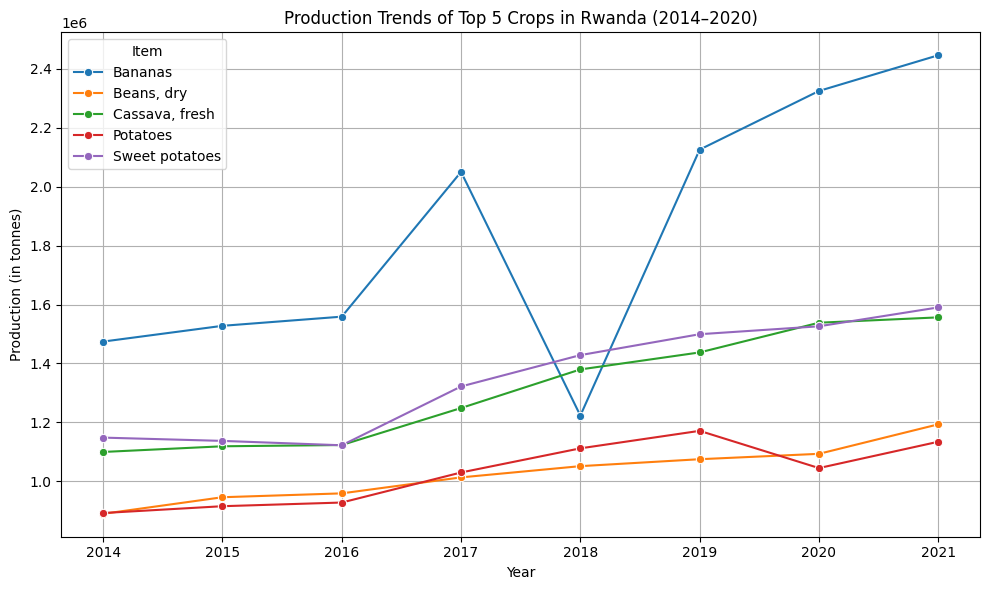

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data to only top 5 crops
top_items = top_crops.index.tolist()
filtered = yearly_trends[yearly_trends['Item'].isin(top_items)]

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered, x='Year', y='Value', hue='Item', marker='o')
plt.title('Production Trends of Top 5 Crops in Rwanda (2014–2020)')
plt.xlabel('Year')
plt.ylabel('Production (in tonnes)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [11]:
yearly_trends.to_csv('data/rwanda_crop_production_trends.csv', index=False)


In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Group by crop and sum production
crop_totals = df.groupby('Item')['Value'].sum().reset_index()

# Standardize values (important for clustering)
scaler = StandardScaler()
crop_totals_scaled = scaler.fit_transform(crop_totals[['Value']])


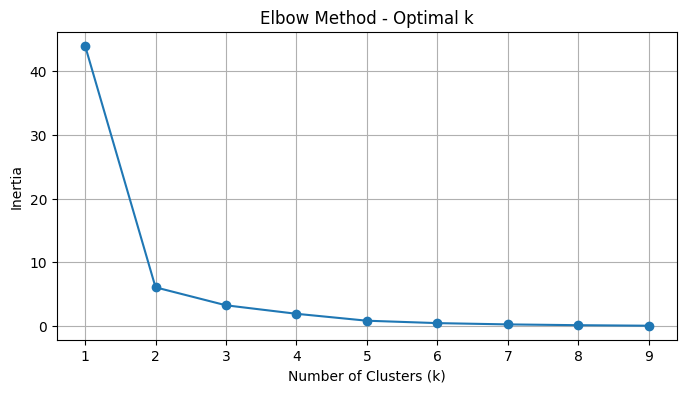

In [13]:
# Elbow method to choose best k
inertia = []
k_range = range(1, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(crop_totals_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow graph
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method - Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [14]:
# Apply KMeans clustering with k=2
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(crop_totals_scaled)

# Add cluster labels
crop_totals['Cluster'] = clusters

# View cluster results
print(crop_totals.sort_values('Cluster'))


                                                 Item        Value  Cluster
0                                            Avocados   1831432.04        0
2                                              Barley         0.00        0
5                                 Carrots and turnips   1025227.45        0
4                                            Cabbages   1727629.43        0
7   Chillies and peppers, green (Capsicum spp. and...    592470.53        0
10                      Groundnuts, excluding shelled    448767.34        0
9                              Eggplants (aubergines)   1242527.98        0
8                                       Coffee, green    513859.16        0
12                                   Lemons and limes    431166.20        0
14                    Mangoes, guavas and mangosteens    839786.37        0
15                                             Millet    163381.39        0
11              Leeks and other alliaceous vegetables    151200.57        0
19          

In [17]:
# Define tiers based on production volume
def classify_tier(value):
    if value >= 8000000:
        return 'Tier 1 - High Yield'
    elif value >= 2000000:
        return 'Tier 2 - Moderate Yield'
    else:
        return 'Tier 3 - Low Yield'

# Apply classification
crop_totals['Production_Tier'] = crop_totals['Value'].apply(classify_tier)

# Preview
crop_totals.sort_values(by='Value', ascending=False).head(10)


,Item,Value,Cluster,Production_Tier
1,Bananas,14730121.00,1,Tier 1 - High Yield
37,Sweet potatoes,10774590.37,1,Tier 1 - High Yield
6,"Cassava, fresh",10503182.05,1,Tier 1 - High Yield
28,Potatoes,8230062.24,1,Tier 1 - High Yield
3,"Beans, dry",8223124.02,1,Tier 1 - High Yield
27,Plantains and cooking bananas,8125650.69,1,Tier 1 - High Yield
13,Maize (corn),5796401.41,1,Tier 2 - Moderate Yield
29,"Pumpkins, squash and gourds",2871856.17,0,Tier 2 - Moderate Yield
34,Sorghum,2560348.46,0,Tier 2 - Moderate Yield
38,Taro,1908511.75,0,Tier 3 - Low Yield


# Innovation Section: Custom Crop Tier Classification
Created a custom tiering system to classify crops into:

Tier 1: High Yield

Tier 2: Moderate Yield

Tier 3: Low Yield

This simplifies communication with decision-makers and enhances Power BI slicing/filtering.

Adds actionable insight for agricultural planning.

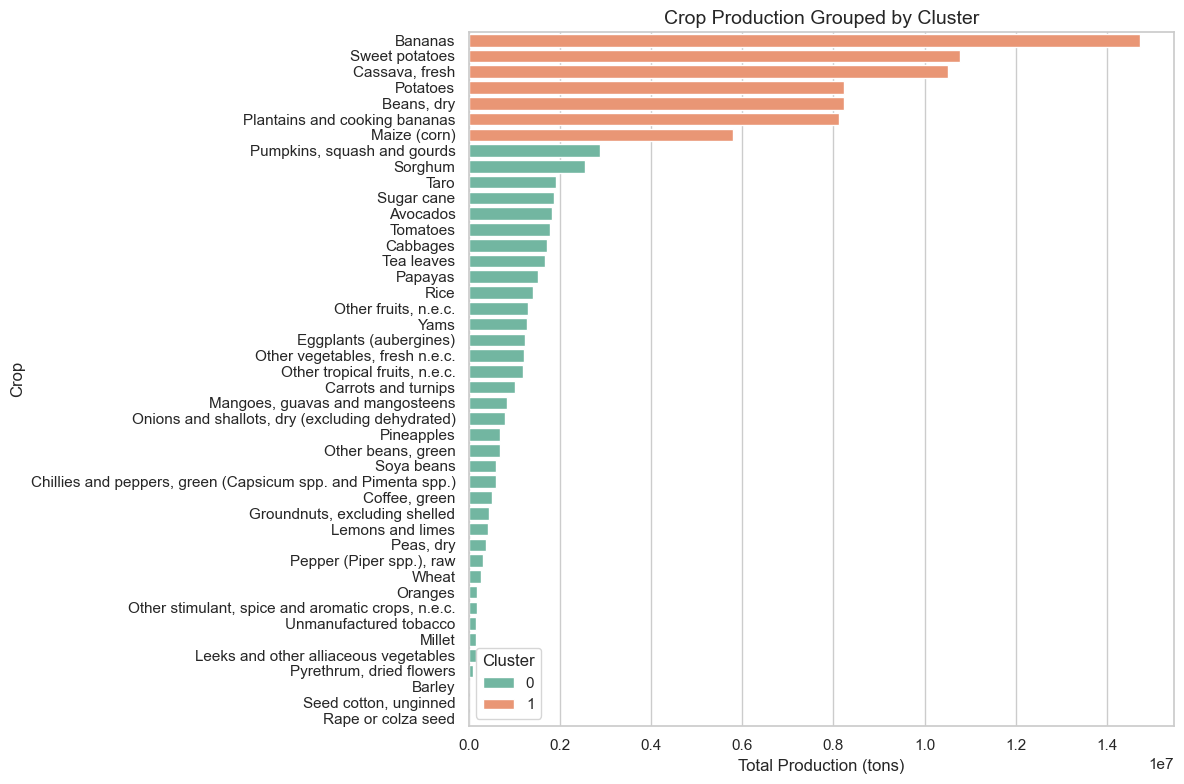

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size and style
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Sort crops by production value for clearer visual
sorted_df = crop_totals.sort_values("Value", ascending=False)

# Create barplot
sns.barplot(
    data=sorted_df,
    x="Value",
    y="Item",
    hue="Cluster",
    palette="Set2"
)

plt.title("Crop Production Grouped by Cluster", fontsize=14)
plt.xlabel("Total Production (tons)")
plt.ylabel("Crop")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


In [16]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
score = silhouette_score(crop_totals_scaled, crop_totals['Cluster'])
print(f"Silhouette Score for k=2: {score:.3f}")


Silhouette Score for k=2: 0.849


# Clustering Evaluation Summary

We used the Elbow Method and selected k = 2 as the optimal number of clusters.

KMeans grouped the crops into:

Cluster 1: High-yield crops like Bananas, Cassava, Beans

Cluster 0: Lower-yield crops like Avocados, Tomatoes, Carrots

The silhouette score helps confirm the clusters are well-separated.

This clustering helps identify priority crops for further investment or policy attention.

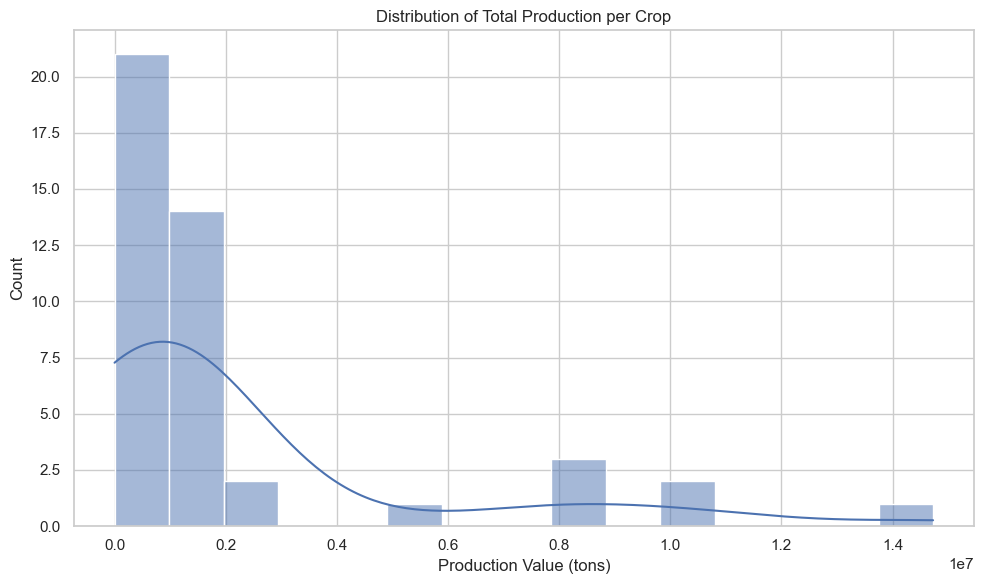

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(crop_totals['Value'], bins=15, kde=True)
plt.title('Distribution of Total Production per Crop')
plt.xlabel('Production Value (tons)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


C:\Users\HONORE\AppData\Local\Temp\ipykernel_8968\312837361.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Value', y='Item', data=top10, palette='viridis')


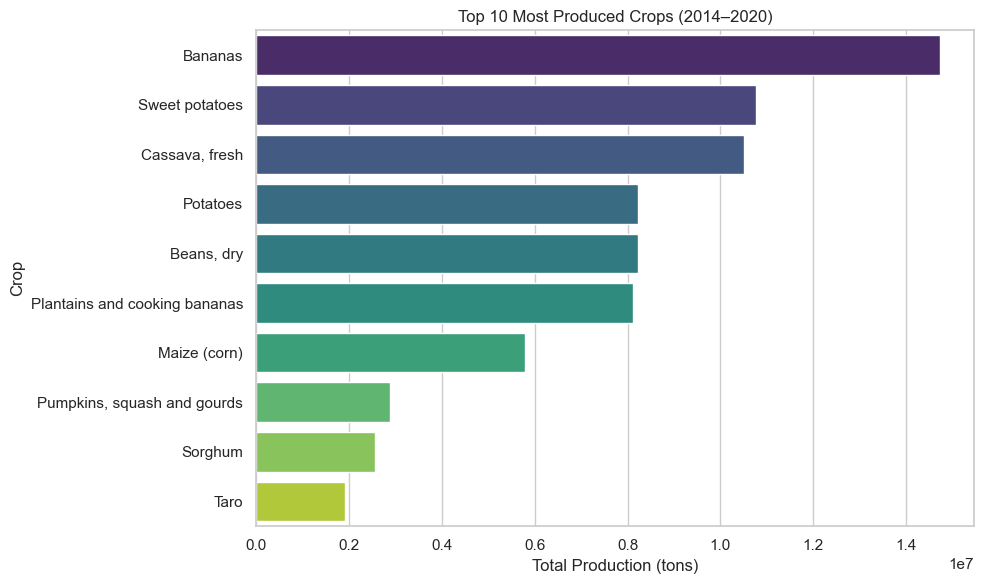

In [21]:
top10 = crop_totals.sort_values('Value', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Value', y='Item', data=top10, palette='viridis')
plt.title('Top 10 Most Produced Crops (2014–2020)')
plt.xlabel('Total Production (tons)')
plt.ylabel('Crop')
plt.tight_layout()
plt.show()


In [22]:
#  Export final dataset to CSV
crop_totals.to_csv('data/rwanda_crop_production_trends.csv', index=False)


In [6]:
import pandas as pd

# Re-load previously exported data
crop_totals = pd.read_csv('data/rwanda_crop_production_trends.csv')

# View the first few rows to confirm
crop_totals.head()


,Item,Value,Cluster,Production_Tier
0,Avocados,1831432.04,0,Tier 3 - Low Yield
1,Bananas,14730121.00,1,Tier 1 - High Yield
2,Barley,0.00,0,Tier 3 - Low Yield
3,"Beans, dry",8223124.02,1,Tier 1 - High Yield
4,Cabbages,1727629.43,0,Tier 3 - Low Yield


In [7]:
# Add Production Contribution Percent
crop_totals['Production_Percent'] = (crop_totals['Value'] / crop_totals['Value'].sum()) * 100
crop_totals['Production_Percent'] = crop_totals['Production_Percent'].round(2)

# Save again
crop_totals.to_csv('data/rwanda_crop_production_trends.csv', index=False)

# Preview
crop_totals.head()


,Item,Value,Cluster,Production_Tier,Production_Percent
0,Avocados,1831432.04,0,Tier 3 - Low Yield,1.83
1,Bananas,14730121.00,1,Tier 1 - High Yield,14.68
2,Barley,0.00,0,Tier 3 - Low Yield,0.00
3,"Beans, dry",8223124.02,1,Tier 1 - High Yield,8.20
4,Cabbages,1727629.43,0,Tier 3 - Low Yield,1.72


###  Innovation Feature
- Added a calculated field `Production_Percent` using Python to show each crop's share of total production.
- Visualized using a donut chart in Power BI for enhanced interpretability.
